In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_exams = pd.read_csv("./datasets/1698696961761-attachment.csv")

In [3]:
df_exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [4]:
df_exams.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [5]:
df_exams['genero'].unique()

array(['M', 'F'], dtype=object)

In [6]:
df_exams.drop(columns=["id_paciente"], axis=1, inplace=True)

In [7]:
df_exams = pd.get_dummies(df_exams, columns=['genero'], dtype="int64")

<Axes: >

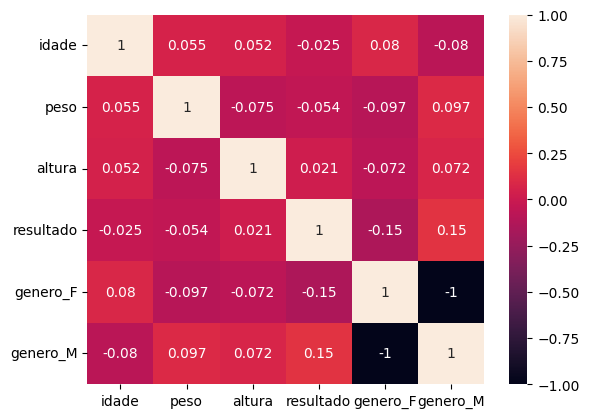

In [8]:
sns.heatmap(df_exams.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

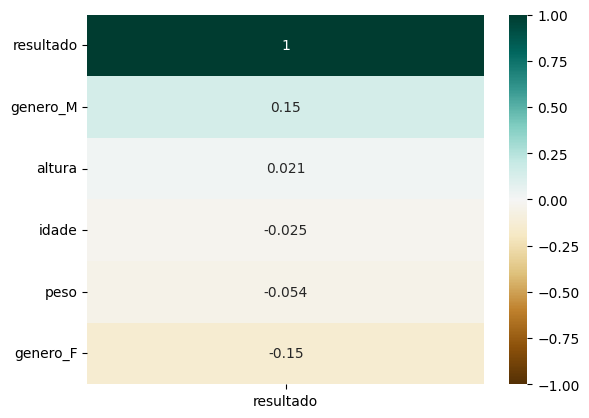

In [9]:
sns.heatmap(df_exams.corr()[['resultado']].sort_values(by="resultado", ascending=False), vmin=-1, vmax=1, 
            annot=True,cmap="BrBG")

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


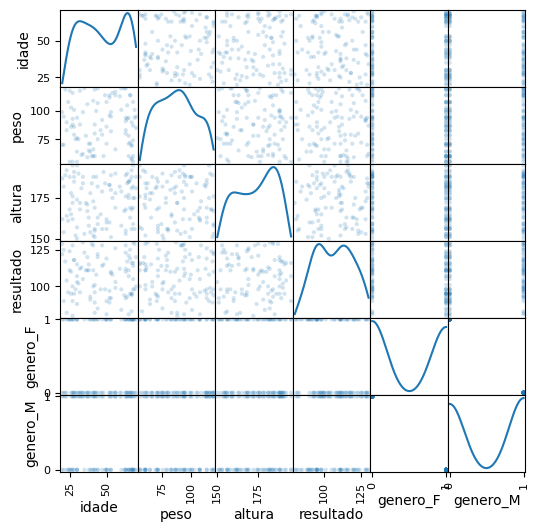

In [10]:
pd.plotting.scatter_matrix(df_exams, alpha=0.2, figsize=(6,6), diagonal="kde")

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>, <Axes: >, <Axes: >]],
      dtype=object)

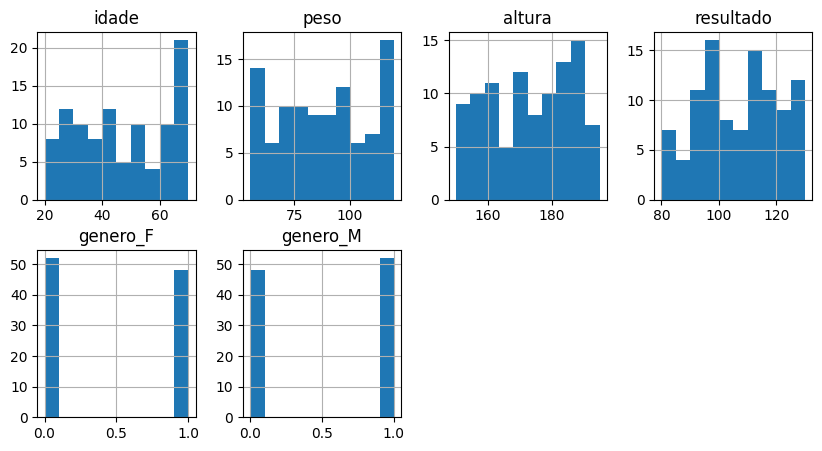

In [11]:
df_exams.hist(layout=(2,4), figsize=(10,5))

In [12]:
df_exams['imc'] = (df_exams['peso'] / ((df_exams['altura'] / 100) ** 2))

In [13]:
df_exams.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [14]:
df_exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


<Axes: >

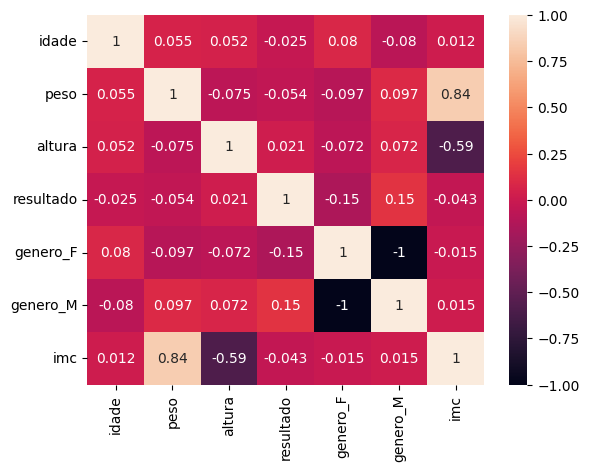

In [15]:
sns.heatmap(df_exams.corr(), vmin=-1, vmax=1, annot=True)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score 

In [21]:
# Model 1 - without IMC
x = df_exams.drop(columns=['imc', 'resultado'])
y = df_exams['resultado']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=51)

In [28]:
model_1 = LinearRegression().fit(x_train, y_train)

In [29]:
y_pred = model_1.predict(x_test)

In [31]:
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [32]:
model_1.intercept_

np.float64(94.21133142019876)

In [33]:
model_1.score(x_train, y_train)

0.06218388634297234

In [34]:
model_1.score(x_test, y_test)

-0.13640904479106397

In [35]:
r2_score(y_test, y_pred)

-0.13640904479106397

In [36]:
mean_absolute_error(y_test, y_pred)

12.695569181179541

In [37]:
# Model 2 - only imc
x = pd.DataFrame(df_exams['imc'])
y = df_exams['resultado']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=51)

In [39]:
model_2 = LinearRegression().fit(x_train, y_train)

In [41]:
y_pred = model_2.predict(x_test)

In [43]:
model_2.coef_

array([-0.21677589])

In [44]:
model_2.intercept_

np.float64(112.15019229088837)

In [45]:
model_2.score(x_train, y_train)

0.015285962664806862

In [46]:
model_2.score(x_test, y_test)

-0.08898328562401758

In [48]:
mean_absolute_error(y_test, y_pred)

12.5056514070601

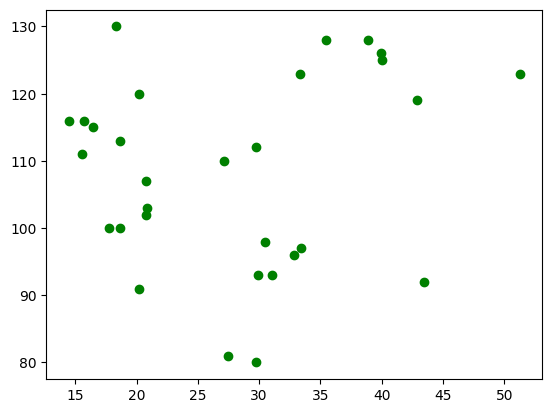

In [49]:
plt.scatter(x_test, y_test, color='g')
plt.plot(x_test, y_pred, color='k')